In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
df = pd.read_csv('./merged_df.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,ada_close,ada_Volume ADA,ada_Volume USDT,eth_close,eth_Volume ETH,eth_Volume USDT,xrp_close,xrp_Volume XRP,xrp_Volume USDT,btc_close,...,vix_smavg15,reddit_bearish,reddit_bullish,twitter_bearish,twitter_bullish,bitcointalk_bearish,bitcointalk_bullish,sum_bearish,sum_bullish,dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2022-11-29 01:00:00,0.305082,36722.2496,11206.406143,1166.17,354.157873,4.132154e+05,0.38476,5.806907e+05,2.240386e+05,16179.1,...,NaN,2.0,4.0,3.0,6.0,1.0,1.0,6.0,11.0,1
2022-11-29 00:00:00,0.305083,530398.7033,161961.925008,1167.18,3416.572456,3.978595e+06,0.38664,2.553067e+06,9.901472e+05,16178.2,...,NaN,2.0,6.0,4.0,10.0,0.0,0.0,6.0,16.0,1
2022-11-28 23:00:00,0.306541,201481.2701,61715.779290,1167.67,2592.844450,3.030296e+06,0.38880,1.975420e+06,7.700656e+05,16213.5,...,NaN,4.0,4.0,1.0,4.0,2.0,1.0,7.0,9.0,0
2022-11-28 22:00:00,0.306417,303165.1905,92984.577681,1170.78,784.308610,9.193430e+05,0.39005,9.559267e+05,3.725898e+05,16218.6,...,NaN,8.0,5.0,0.0,3.0,3.0,1.0,11.0,9.0,0
2022-11-28 21:00:00,0.306611,370171.9799,113331.495591,1172.61,2782.338483,3.258407e+06,0.38843,3.977460e+06,1.545883e+06,16200.6,...,NaN,7.0,9.0,4.0,8.0,1.0,2.0,12.0,19.0,0


In [3]:
btc_df = df[~df['btc_close'].isna()]
btc_df.index.min(), btc_df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2022-11-29 01:00:00'))

In [4]:
# add prediction class
btc_df['price_chg'] = btc_df['btc_close'].pct_change().shift(-1)
btc_df['price_dir'] = btc_df['price_chg'].apply(lambda x: 1 if x > 0 else 0)
#btc_df['lagged_price_chg'] = btc_df['price_chg'].shift(24)
#btc_df['lagged_price_chg_6'] = btc_df['price_chg'].shift(6)
#btc_df['lagged_price_chg_1'] = btc_df['price_chg'].shift(1)
#btc_df[['btc_close', 'price_chg', 'price_dir', 'lagged_price_chg_1']].tail()
btc_df['ada_change'] = btc_df['ada_close'].pct_change().shift(-1)
btc_df['eth_change'] = btc_df['eth_close'].pct_change().shift(-1)
btc_df['xrp_change'] = btc_df['xrp_close'].pct_change().shift(-1)

/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/936948957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['price_chg'] = btc_df['btc_close'].pct_change().shift(-1)
/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/936948957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['price_dir'] = btc_df['price_chg'].apply(lambda x: 1 if x > 0 else 0)
/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/936948957.py:8: SettingWithCopyWarning: 
A value is tr

In [5]:
# log transformation to volume
def log_volume(df, col):
    x = np.log(df[col])
    return x.replace(-np.inf, np.nan)

for c in btc_df.columns:
  if 'volume' in c.lower():
    btc_df[c] = log_volume(btc_df, c)

btc_df.head()

/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/3771950606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df[c] = log_volume(btc_df, c)


,ada_close,ada_Volume ADA,ada_Volume USDT,eth_close,eth_Volume ETH,eth_Volume USDT,xrp_close,xrp_Volume XRP,xrp_Volume USDT,btc_close,...,bitcointalk_bearish,bitcointalk_bullish,sum_bearish,sum_bullish,dayofweek,price_chg,price_dir,ada_change,eth_change,xrp_change
date,,,,,,,,,,,,,,,,,,,,,
2022-11-29 01:00:00,0.305082,10.511138,9.324241,1166.17,5.869743,12.931724,0.38476,13.271974,12.319574,16179.1,...,1.0,1.0,6.0,11.0,1,-0.000056,0,0.000003,0.000866,0.004886
2022-11-29 00:00:00,0.305083,13.181384,11.995117,1167.18,8.136393,15.196439,0.38664,14.752806,13.805609,16178.2,...,0.0,0.0,6.0,16.0,1,0.002182,1,0.004779,0.000420,0.005587
2022-11-28 23:00:00,0.306541,12.213452,11.030295,1167.67,7.860511,14.924171,0.38880,14.496291,13.554231,16213.5,...,2.0,1.0,7.0,9.0,0,0.000315,1,-0.000405,0.002663,0.003215
2022-11-28 22:00:00,0.306417,12.622033,11.440189,1170.78,6.664803,13.731415,0.39005,13.770437,12.828233,16218.6,...,3.0,1.0,11.0,9.0,0,-0.001110,0,0.000633,0.001563,-0.004153
2022-11-28 21:00:00,0.306611,12.821723,11.638072,1172.61,7.931047,14.996749,0.38843,15.196154,14.251106,16200.6,...,1.0,2.0,12.0,19.0,0,0.003728,1,0.001823,0.001961,-0.005690


In [6]:
# split train, evaluate and test
train_df = btc_df[btc_df.index.year <= 2021]
test_df = btc_df[btc_df.index.year > 2021]
train_df.sort_index(inplace=True)
test_df.sort_index(inplace=True)

train_df.shape, test_df.shape

/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/2709207899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_index(inplace=True)
/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/2709207899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_index(inplace=True)


((26409, 31), (7970, 31))

In [7]:
y_train = train_df['price_dir']
y_test = test_df['price_dir']

In [8]:
# fill missing values with last historical data
for df in [train_df, test_df]:
    df.fillna(method='ffill', inplace=True)
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26409 entries, 2019-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ada_close            21966 non-null  float64
 1   ada_Volume ADA       21966 non-null  float64
 2   ada_Volume USDT      21966 non-null  float64
 3   eth_close            26409 non-null  float64
 4   eth_Volume ETH       26409 non-null  float64
 5   eth_Volume USDT      26409 non-null  float64
 6   xrp_close            26409 non-null  float64
 7   xrp_Volume XRP       26409 non-null  float64
 8   xrp_Volume USDT      26409 non-null  float64
 9   btc_close            26409 non-null  float64
 10  btc_Volume BTC       26409 non-null  float64
 11  btc_Volume USDT      26409 non-null  float64
 12  fx_price             26361 non-null  float64
 13  spot_rate            26408 non-null  float64
 14  vix                  26382 non-null  float64
 15  v

/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/4163002457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


In [9]:
# add ADA daily data to fill missing values from 2019-01 to 2019-07
ada_df = yf.download('ADA-USD', start='2019-01-01', end='2019-07-04')
ada_df['Volume'] /= 24
ada_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,0.040984,0.042547,0.040308,0.042547,0.042547,6.234542e+05
2019-01-02,0.042568,0.045563,0.041982,0.045258,0.045258,1.006314e+06
2019-01-03,0.045106,0.045259,0.042535,0.042682,0.042682,8.802901e+05
2019-01-04,0.042629,0.044092,0.042477,0.043812,0.043812,6.676679e+05
2019-01-05,0.043659,0.045570,0.043350,0.044701,0.044701,1.045874e+06


In [10]:
# new_train_df with ADA daily data from yfinance
new_train_df = pd.merge_asof(train_df, ada_df[['Adj Close']], left_index=True, right_index=True)
new_train_df['ada_close'].fillna(new_train_df['Adj Close'], inplace=True)
new_train_df.head()

,ada_close,ada_Volume ADA,ada_Volume USDT,eth_close,eth_Volume ETH,eth_Volume USDT,xrp_close,xrp_Volume XRP,xrp_Volume USDT,btc_close,...,bitcointalk_bullish,sum_bearish,sum_bullish,dayofweek,price_chg,price_dir,ada_change,eth_change,xrp_change,Adj Close
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.042547,NaN,NaN,131.864147,4.225784,9.104703,0.348020,3.429594,2.374098,3700.368284,...,0.0,3.0,3.0,1,NaN,0,NaN,NaN,NaN,0.042547
2019-01-01 01:00:00,0.042547,NaN,NaN,131.185498,4.602942,9.481210,0.347538,3.593926,2.537044,3687.685134,...,0.0,3.0,3.0,1,0.003439,1,0.0,0.005173,0.001387,0.042547
2019-01-01 02:00:00,0.042547,NaN,NaN,130.593948,5.028953,9.902660,0.351838,4.046206,3.001604,3687.886662,...,3.0,2.0,5.0,1,-0.000055,0,0.0,0.004530,-0.012222,0.042547
2019-01-01 03:00:00,0.042547,NaN,NaN,131.227012,3.307338,8.183256,0.351838,4.046206,3.001604,3692.355821,...,2.0,2.0,4.0,1,-0.001210,0,0.0,-0.004824,0.000000,0.042547
2019-01-01 04:00:00,0.042547,NaN,NaN,132.261349,6.372704,11.265479,0.351838,5.687898,4.643313,3697.033403,...,0.0,0.0,1.0,1,-0.001265,0,0.0,-0.007820,0.000000,0.042547


In [11]:
new_train_df = new_train_df.drop(['Adj Close'], axis = 1)

In [12]:
new_train_df.columns
len(new_train_df.columns)

31

In [13]:
# exclude = ['btc_close', 'price_chg', 'price_dir',
#             'reddit_bearish', 'reddit_bullish', 'twitter_bearish',
#            'twitter_bullish', 'bitcointalk_bearish', 'bitcointalk_bullish' ,     # using other sentiment cols
#            'ada_Volume ADA', 'ada_Volume USDT'] # missing values

exclude = ['price_dir', 'price_chg', 'btc_close',
             'reddit_bearish', 'reddit_bullish', 'twitter_bearish',
            'twitter_bullish', 'bitcointalk_bearish', 'bitcointalk_bullish' ,     # using other sentiment cols
            'ada_Volume ADA', 'ada_Volume USDT']
feat = [x for x in train_df.columns if x not in exclude]
null_col = [k for k, v in dict(btc_df.isna().sum()).items() if v > 0]
feat

['ada_close',
 'eth_close',
 'eth_Volume ETH',
 'eth_Volume USDT',
 'xrp_close',
 'xrp_Volume XRP',
 'xrp_Volume USDT',
 'btc_Volume BTC',
 'btc_Volume USDT',
 'fx_price',
 'spot_rate',
 'vix',
 'vix_ticks',
 'vix_smavg15',
 'sum_bearish',
 'sum_bullish',
 'dayofweek',
 'ada_change',
 'eth_change',
 'xrp_change']

In [14]:
scale = StandardScaler()
new_train_df[new_train_df.columns] = scale.fit_transform(new_train_df)
new_train_df.head()

,ada_close,ada_Volume ADA,ada_Volume USDT,eth_close,eth_Volume ETH,eth_Volume USDT,xrp_close,xrp_Volume XRP,xrp_Volume USDT,btc_close,...,bitcointalk_bearish,bitcointalk_bullish,sum_bearish,sum_bullish,dayofweek,price_chg,price_dir,ada_change,eth_change,xrp_change
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-0.6602,NaN,NaN,-0.713467,-1.908218,-1.751459,-0.369567,-3.263161,-2.958628,-0.951520,...,-0.964483,-1.102905,-0.700676,-1.208172,-0.999175,NaN,-0.968866,NaN,NaN,NaN
2019-01-01 01:00:00,-0.6602,NaN,NaN,-0.713977,-1.651299,-1.591775,-0.370954,-3.203952,-2.906001,-0.952183,...,-0.270109,-1.102905,-0.700676,-1.208172,-0.999175,0.428248,1.032134,0.002424,0.516229,0.102493
2019-01-01 02:00:00,-0.6602,NaN,NaN,-0.714420,-1.361102,-1.413030,-0.358588,-3.040993,-2.755962,-0.952173,...,-0.270109,0.307653,-0.884161,-0.979167,-0.999175,0.000949,-0.968866,0.002424,0.452930,-0.941875
2019-01-01 03:00:00,-0.6602,NaN,NaN,-0.713945,-2.533861,-2.142263,-0.358588,-3.040993,-2.755962,-0.951939,...,0.424265,-0.162533,-0.884161,-1.093670,-0.999175,-0.140393,-0.968866,0.002424,-0.467171,-0.003944
2019-01-01 04:00:00,-0.6602,NaN,NaN,-0.713169,-0.445743,-0.835031,-0.358588,-2.449485,-2.225737,-0.951694,...,-0.964483,-1.102905,-1.251132,-1.437178,-0.999175,-0.147100,-0.968866,0.002424,-0.761896,-0.003944


In [15]:
scale = StandardScaler()
test_df[test_df.columns] = scale.fit_transform(test_df)
test_df.head()

/var/folders/l9/gfrx15l17mb69q1whm7v0dh80000gn/T/ipykernel_9480/744514119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[test_df.columns] = scale.fit_transform(test_df)


,ada_close,ada_Volume ADA,ada_Volume USDT,eth_close,eth_Volume ETH,eth_Volume USDT,xrp_close,xrp_Volume XRP,xrp_Volume USDT,btc_close,...,bitcointalk_bearish,bitcointalk_bullish,sum_bearish,sum_bullish,dayofweek,price_chg,price_dir,ada_change,eth_change,xrp_change
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.156881,-0.372961,0.508914,2.139347,-0.527761,0.297868,1.702163,0.673905,1.265483,1.728157,...,-0.990017,-1.034801,-0.462099,1.020930,0.993511,-1.331538,-1.008063,-1.589814,-1.317146,-1.220811
2022-01-01 01:00:00,2.149639,-0.478787,0.425053,2.142186,-0.800718,0.022371,1.702380,0.913676,1.491594,1.741229,...,-0.990017,-1.034801,-0.462099,-0.318809,0.993511,-0.417049,-1.008063,0.133488,-0.081918,-0.019689
2022-01-01 02:00:00,2.143226,-1.133435,-0.147560,2.146546,-1.452675,-0.657167,1.717767,-0.360763,0.354266,1.743486,...,-0.990017,-0.261562,-0.462099,-0.510201,0.993511,-0.090278,-1.008063,0.115814,-0.115104,-0.361156
2022-01-01 03:00:00,2.139388,-0.766958,0.171014,2.140418,-1.516568,-0.723972,1.708524,-0.836408,-0.067982,1.745223,...,-0.990017,-0.261562,-0.462099,-1.275766,0.993511,-0.074578,-1.008063,0.060322,0.114100,0.193717
2022-01-01 04:00:00,2.084290,-0.675486,0.240801,2.120951,-0.896175,-0.082155,1.677587,-0.383704,0.327636,1.734248,...,-0.339206,-1.034801,-0.462099,-1.275766,0.993511,0.309934,0.992002,1.182766,0.407496,0.687818


In [16]:
X_train = new_train_df.drop(exclude, axis = 1)
X_test = test_df.drop(exclude, axis = 1)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(26409, 20) (7970, 20)
(26409,) (7970,)


In [18]:
na_free = X_train.dropna()
only_na = X_train[~X_train.index.isin(na_free.index)]
only_na.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00', '2019-01-01 13:00:00',
               '2019-01-01 14:00:00', '2019-01-01 15:00:00',
               '2019-01-01 16:00:00', '2019-01-01 17:00:00',
               '2019-01-01 18:00:00', '2019-01-01 19:00:00',
               '2019-01-01 20:00:00', '2019-01-01 21:00:00',
               '2019-01-01 22:00:00', '2019-01-01 23:00:00',
               '2019-01-02 00:00:00', '2019-01-02 01:00:00',
               '2019-01-02 02:00:00', '2019-01-02 03:00:00',
               '2019-01-02 04:00:00', '2019-01-02 05:00:00',
               '2019-01-02 06:00:00', '2019-01-02 07:00:00',
               '2019-01-

In [19]:
X_train = X_train.drop(only_na.index, axis = 0)
y_train = y_train.drop(only_na.index, axis = 0)

In [20]:
X_train.shape, y_train.shape

((26361, 20), (26361,))

In [21]:
na_free = X_test.dropna()
only_na = X_test[~X_test.index.isin(na_free.index)]
only_na.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               '2022-01-01 10:00:00', '2022-01-01 11:00:00',
               '2022-01-01 12:00:00', '2022-01-01 13:00:00',
               '2022-01-01 14:00:00', '2022-01-01 15:00:00',
               '2022-01-01 16:00:00', '2022-01-01 17:00:00',
               '2022-01-01 18:00:00', '2022-01-01 19:00:00',
               '2022-01-01 20:00:00', '2022-01-01 21:00:00',
               '2022-01-01 22:00:00', '2022-01-01 23:00:00',
               '2022-01-02 00:00:00', '2022-01-02 01:00:00',
               '2022-01-02 02:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)

In [22]:
X_test = X_test.drop(only_na.index, axis = 0)
y_test = y_test.drop(only_na.index, axis = 0)

In [23]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(26361, 20) (7943, 20)
(26361,) (7943,)


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [25]:
treefit = DecisionTreeClassifier().fit(X_train, y_train)
yhat_tree = treefit.predict(X_test)
np.mean(yhat_tree != y_test) #misclassification rate

0.3094548659196777

In [26]:
treefit.get_depth(), treefit.get_n_leaves()

(33, 3122)

In [27]:
treefit = DecisionTreeClassifier(min_samples_leaf = 20).fit(X_train,y_train)
yhat_tree = treefit.predict(X_test)
np.mean(yhat_tree != y_test)

0.18028452725670402

In [28]:
treefit.get_depth(), treefit.get_n_leaves()

(19, 732)

In [29]:
accuracy_score(yhat_tree, y_test) #Decision Tree Accuracy Score

0.819715472743296

In [30]:
conf = metrics.confusion_matrix(yhat_tree, y_test)
conf

array([[3338,  832],
       [ 600, 3173]])

In [31]:
from sklearn.metrics import classification_report

In [32]:
prec = conf[0][0] / (conf[0][0] + conf[0][1])
print(prec)
recall = conf[0][0] / (conf[0][0] + conf[1][0])
print(recall)
fscore = (2 * prec * recall) / (prec + recall)
print(fscore)

0.8004796163069544
0.8476383951244286
0.8233843117908238


Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

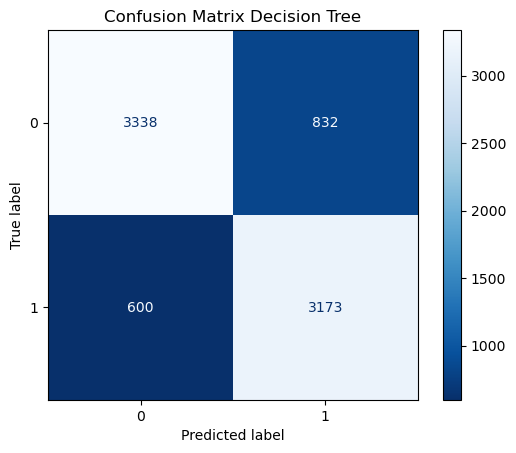

In [33]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(yhat_tree, y_test), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix Decision Tree')

In [34]:
roc_decision = roc_curve(y_test, treefit.predict_proba(X_test)[:,1])

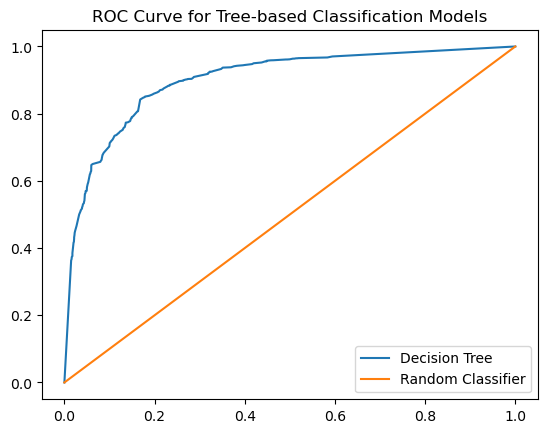

In [35]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
plt.legend((line1, line2), ('Decision Tree', 'Random Classifier'))
plt.title('ROC Curve for Tree-based Classification Models')
plt.show()

In [36]:
treefit = DecisionTreeClassifier()
path = treefit.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
fit_rf = RandomForestClassifier(n_estimators = 500, oob_score = True, random_state = 1).fit(X_train, y_train)
yhat_rf = fit_rf.predict(X_test)
np.mean(yhat_rf != y_test)

0.14818078811532168

In [39]:
accuracy_score(yhat_rf, y_test) #Random Forest Accuracy Score

0.8518192118846784

In [40]:
conf = metrics.confusion_matrix(yhat_rf, y_test)
conf 

array([[3473,  712],
       [ 465, 3293]])

In [41]:
prec = conf[0][0] / (conf[0][0] + conf[0][1])
print(prec)
recall = conf[0][0] / (conf[0][0] + conf[1][0])
print(recall)
fscore = (2 * prec * recall) / (prec + recall)
print(fscore)

0.8298685782556751
0.8819197562214321
0.8551027945340391


Text(0.5, 1.0, 'Random Forest')

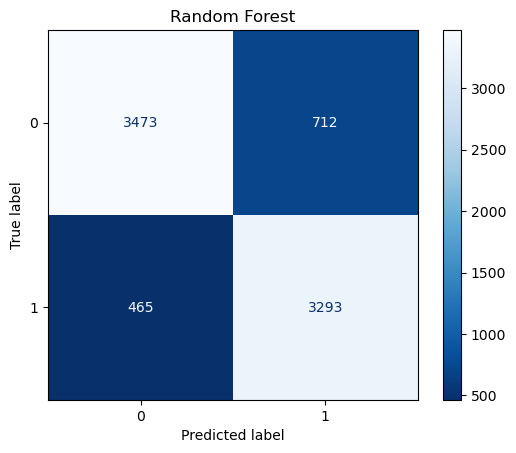

In [42]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(yhat_rf, y_test), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('Random Forest')

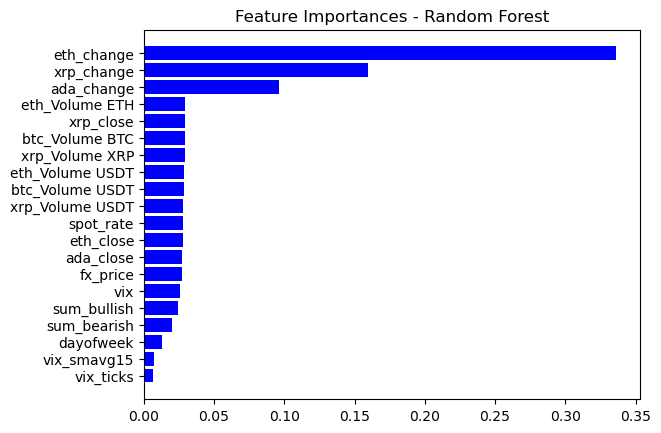

In [43]:
X_features = list(X_train.columns)
rf_importances = fit_rf.feature_importances_
indices = np.argsort(rf_importances)

fig, ax = plt.subplots()
plt.yticks(range(len(indices)), [X_features[i] for i in indices])
ax.barh(range(len(indices)), rf_importances[indices], color = 'b', align = 'center')
ax.set(title = 'Feature Importances - Random Forest')
plt.show()

In [44]:
roc_random = roc_curve(y_test, fit_rf.predict_proba(X_test)[:,1])

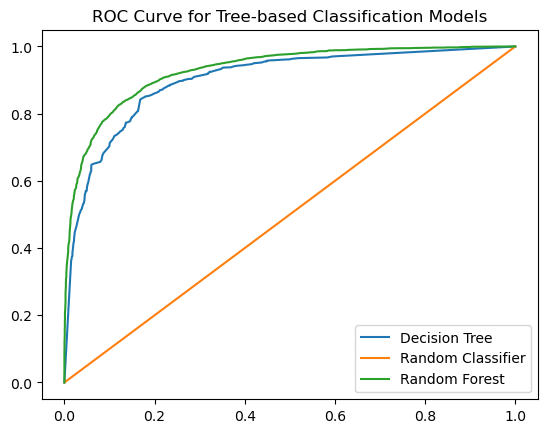

In [45]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
line3, = plt.plot(roc_random[0],roc_random[1])
plt.legend((line1, line2, line3), ('Decision Tree', 'Random Classifier', 'Random Forest'))
plt.title('ROC Curve for Tree-based Classification Models')
plt.show()

# XG Boost

In [46]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 

In [47]:
train_dm = xgb.DMatrix(X_train.values, y_train)
test_dm = xgb.DMatrix(X_test.values, y_test)

In [48]:
xgbc = XGBClassifier(
    max_depth = 6, # How deep should each tree be?
    eta = 0.1, # The learning rate: how big are our steps?
    verbosity = 0, # Whether to print out messages as you fit. 1 makes it quiet
    objective = 'binary:logistic', # What is our loss function? For now, logistic. Would change for multiclas
    gamma = 0, # Would make it harder to get splits in trees
    subsample = 1, # How much to subsample for each tree. Smaller number (like 0.5) would subsample
    colsample_bytree = 1, # like the random forest restriction on variables
    eval_metric = 'logloss',
    min_child_weight = 1,
    seed = 1,
    n_estimators = 100
)

fitted = xgbc.fit(X_train, y_train)

In [49]:
metrics.accuracy_score(y_test, fitted.predict(X_test))

0.8520710059171598

In [50]:
param_grid1 = {
    'max_depth': range(2, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators':range(10,101,10)
}

In [51]:
grid_search = GridSearchCV(estimator = xgbc, param_grid = param_grid1, 
                           scoring = 'roc_auc', cv = 5).fit(X_train, y_train)

In [52]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.1, eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
grid_search.best_params_

{'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 40}

In [54]:
xgbc2 = XGBClassifier(
    max_depth = 2, # How deep should each tree be?
    eta = 0.1, # The learning rate: how big are our steps?
    verbosity = 0, # Whether to print out messages as you fit. 1 makes it quiet
    objective = 'binary:logistic', # What is our loss function? For now, logistic. Would change for multiclas
    gamma = 0, # Would make it harder to get splits in trees
    subsample = 1, # How much to subsample for each tree. Smaller number (like 0.5) would subsample
    colsample_bytree = 1, # like the random forest restriction on variables
    eval_metric = 'logloss',
    min_child_weight = 3,
    seed = 1,
    n_estimators = 40
)

fitted = xgbc2.fit(X_train, y_train)

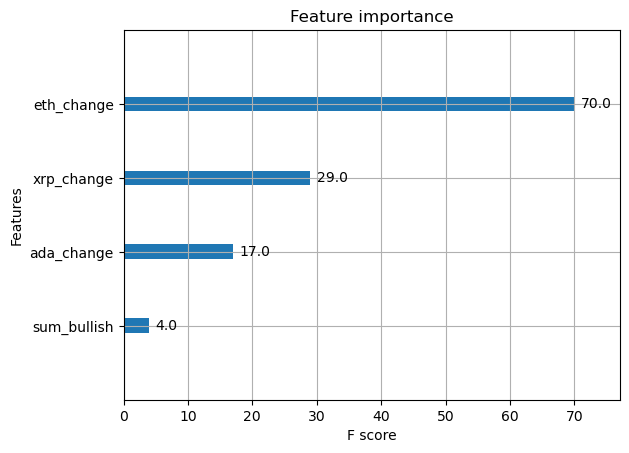

In [55]:
xgb.plot_importance(fitted)
plt.show() 

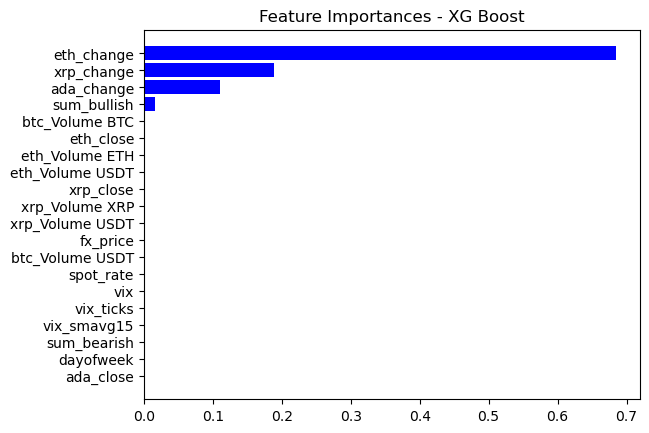

In [56]:
X_features = list(X_train.columns)
rf_importances = fitted.feature_importances_
indices = np.argsort(rf_importances)

fig, ax = plt.subplots()
plt.yticks(range(len(indices)), [X_features[i] for i in indices])
ax.barh(range(len(indices)), rf_importances[indices], color = 'b', align = 'center')
ax.set(title = 'Feature Importances - XG Boost')
plt.show() #feature selection being done as well by XG Boost

In [57]:
preds_xgb = fitted.predict(X_test)
np.mean(preds_xgb != y_test)

0.14087876117336018

In [58]:
accuracy_score(preds_xgb, y_test) #Accuracy Score for XG Boost

0.8591212388266398

In [59]:
conf = metrics.confusion_matrix(preds_xgb, y_test)
conf

array([[3514,  695],
       [ 424, 3310]])

In [60]:
prec = conf[0][0] / (conf[0][0] + conf[0][1])
print(prec)
recall = conf[0][0] / (conf[0][0] + conf[1][0])
print(recall)
fscore = (2 * prec * recall) / (prec + recall)
print(fscore)

0.8348776431456403
0.8923311325545963
0.8626488277893704


Text(0.5, 1.0, 'XG Boost')

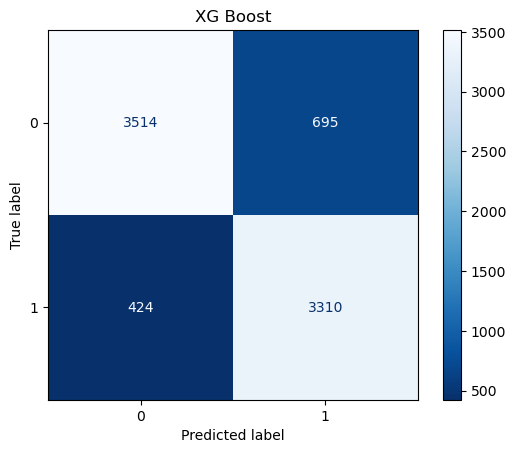

In [61]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(preds_xgb, y_test), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('XG Boost')

In [62]:
roc_xgb = roc_curve(y_test, fitted.predict_proba(X_test)[:,1])

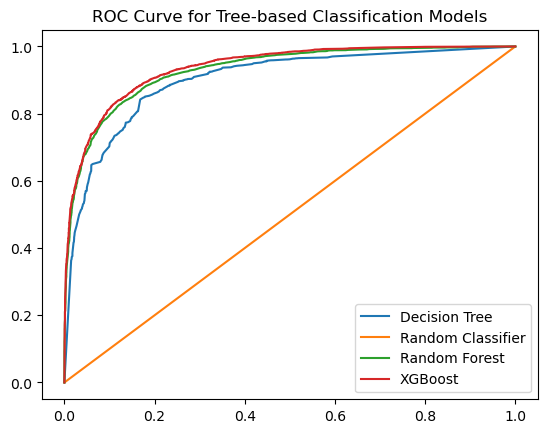

In [63]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
line3, = plt.plot(roc_random[0],roc_random[1])
line4, = plt.plot(roc_xgb[0], roc_xgb[1])
plt.legend((line1, line2, line3, line4), ('Decision Tree', 'Random Classifier', 'Random Forest','XGBoost'))
plt.title('ROC Curve for Tree-based Classification Models')
plt.show()

# Logistic Regression with no penalty

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression(penalty="none").fit(X_train, y_train)
log_pred = clf.predict(X_test)

/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

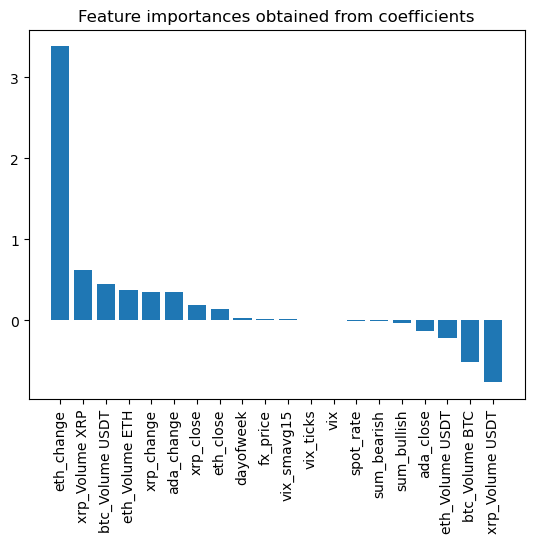

In [67]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

# K Means

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [70]:
kmeans_pred = kmeans.predict(X_test)

In [71]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

if accuracy_score(kmeans_pred, y_test, normalize=False) < accuracy_score(kmeans_pred_2, y_test, normalize=False):
    kmeans_pred = kmeans_pred_2

In [72]:
print(accuracy_score(y_test, log_pred), accuracy_score(y_test,kmeans_pred))

0.8539594611607705 0.5013219186705276


# Logistic with Penalty

In [73]:
clf2 = LogisticRegression(penalty="l2").fit(X_train,y_train)
log_pred2 = clf2.predict(X_test)
print("L2 penalty, accuracy score:", accuracy_score(y_test,log_pred2))

L2 penalty, accuracy score: 0.8540853581770113


/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


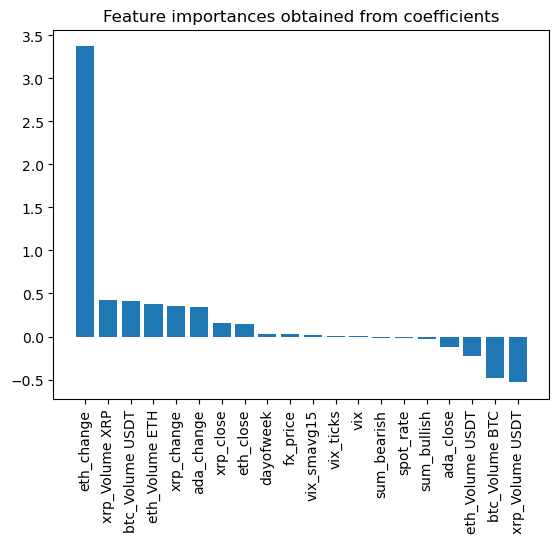

In [74]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf2.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Logistic Regression')

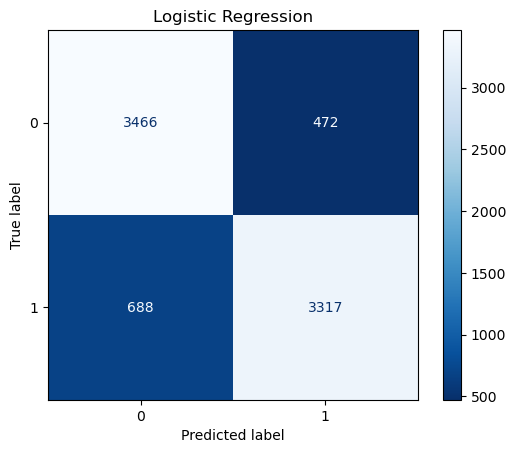

In [75]:
cf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, log_pred), display_labels = np.unique(y_train))
#print(p)
cf_mat.plot(cmap="Blues_r")
plt.title("Logistic Regression")

Text(0.5, 1.0, 'Logistic Regression with L2 penalty')

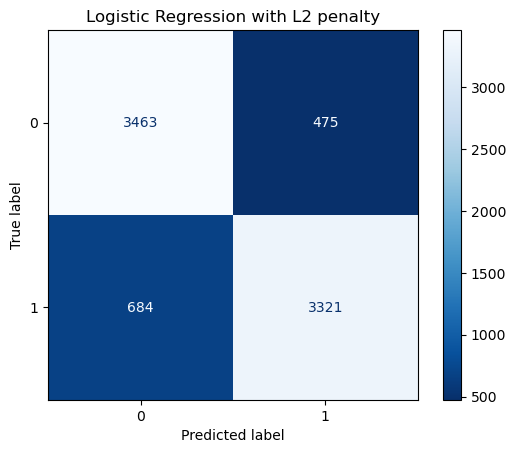

In [76]:
cf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, log_pred2), display_labels = np.unique(y_train))
#print(p)
cf_mat.plot(cmap="Blues_r")
plt.title("Logistic Regression with L2 penalty")

Confusion Matrix
Logistic Regression
Logistic Regression with L2-penalty
K-Means Clustering


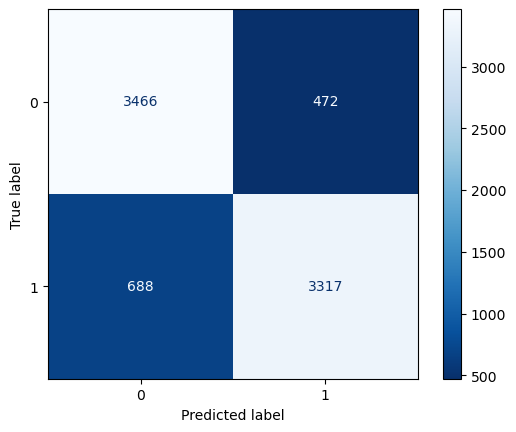

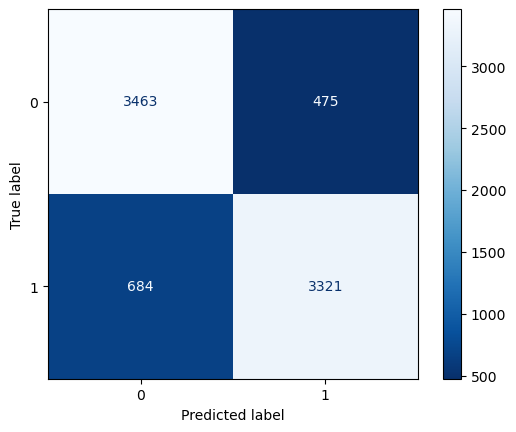

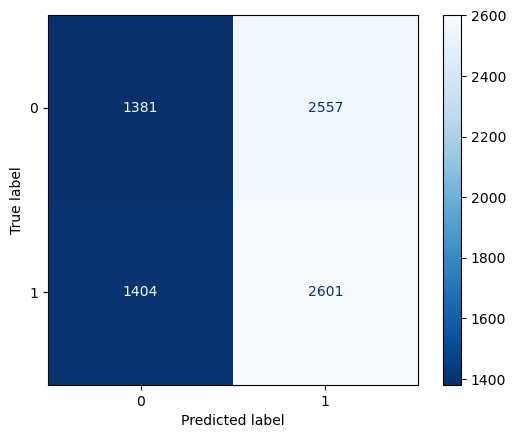

In [78]:
predictions = {"Logistic Regression": log_pred,
                "Logistic Regression with L2-penalty": log_pred2,
                "K-Means Clustering": kmeans_pred}

print("Confusion Matrix")

for p in predictions:
    cf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions[p]), display_labels = np.unique(y_train))
    print(p)
    cf_mat.plot(cmap="Blues_r")
    #plt.title(predictions[p[0]])

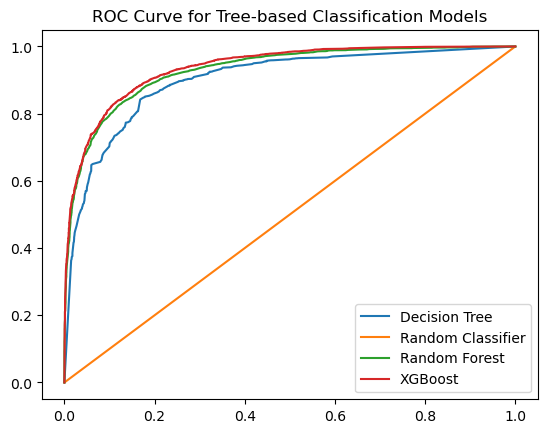

In [79]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
line3, = plt.plot(roc_random[0],roc_random[1])
line4, = plt.plot(roc_xgb[0], roc_xgb[1])
plt.legend((line1, line2, line3, line4), ('Decision Tree', 'Random Classifier', 'Random Forest','XGBoost'))
plt.title('ROC Curve for Tree-based Classification Models')
plt.show()

In [80]:
roc_clf = roc_curve(log_pred, fitted.predict_proba(X_test)[:,1])

In [81]:
roc_clf2 = roc_curve(log_pred2, fitted.predict_proba(X_test)[:,1])

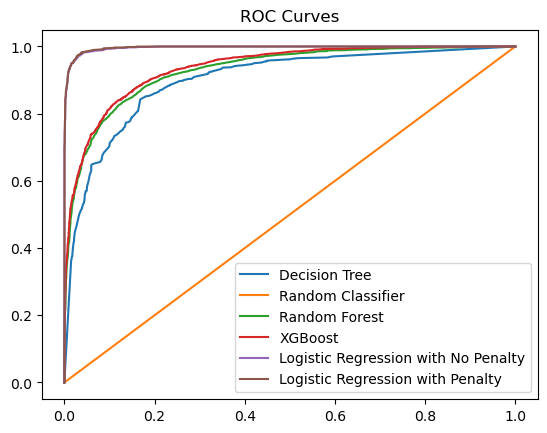

In [82]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
line3, = plt.plot(roc_random[0],roc_random[1])
line4, = plt.plot(roc_xgb[0], roc_xgb[1])
line5, = plt.plot(roc_clf[0], roc_clf[1])
line6, = plt.plot(roc_clf2[0], roc_clf2[1])
plt.legend((line1, line2, line3, line4, line5, line6), 
           ('Decision Tree', 'Random Classifier', 'Random Forest','XGBoost', 'Logistic Regression with No Penalty',
           'Logistic Regression with Penalty'))
plt.title('ROC Curves')
plt.show()

# LDA QDA

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [84]:
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_train)

print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred))
print('\n')
print('Misclassfication rate:', 1-accuracy_score(y_train, y_pred))


Confusion Matrix:
 [[11741  1854]
 [ 2854  9912]]


Misclassfication rate: 0.17859717006183373


Text(0.5, 1.0, 'Confusion Matrix LDA Training')

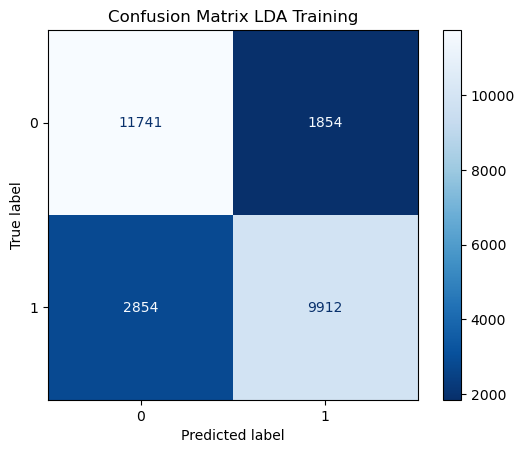

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix LDA Training')

In [86]:
lda2 = LDA()
lda2.fit(X_train, y_train)
X1 = lda2.transform(X_train)

fit = lda2.fit(X_train, y_train)
centeroids = fit.transform(fit.means_)

/Users/nikhilakulukuru/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [87]:
print('Confusion Matrix:\n',confusion_matrix(y_train, y_pred))
print('\n')
print('Misclassfication rate:', 1-accuracy_score(y_train, y_pred))

Confusion Matrix:
 [[11741  1854]
 [ 2854  9912]]


Misclassfication rate: 0.17859717006183373


Text(0.5, 1.0, 'Confusion Matrix LDA Training')

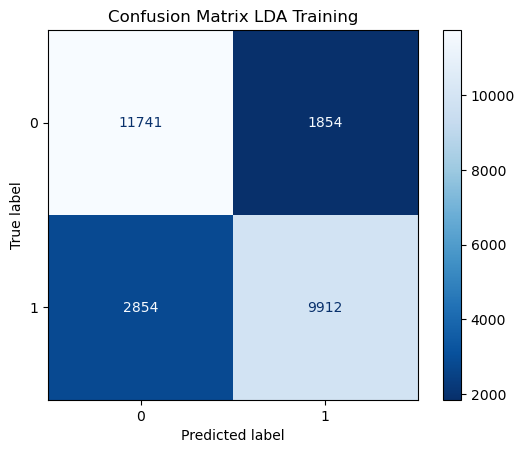

In [88]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix LDA Training')

In [89]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_train)


print(confusion_matrix(y_train, y_pred))
print('\n')
print('Misclassfication rate:', 1-accuracy_score(y_train, y_pred))

[[12000  1595]
 [ 4698  8068]]


Misclassfication rate: 0.2387238723872387


Text(0.5, 1.0, 'Confusion Matrix QDA Training')

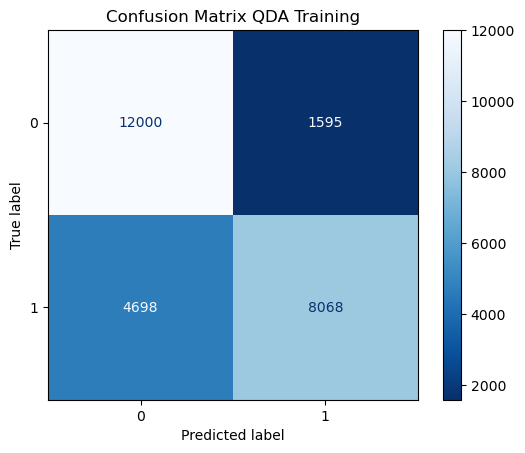

In [90]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), display_labels = np.unique(y_train))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix QDA Training')

In [91]:
lda = LDA()
lda.fit(X_test, y_test)
y_pred_lda = lda.predict(X_test)

In [92]:
y_pred_lda = lda.predict(X_test)
print(confusion_matrix(y_test, y_pred_lda))
print('\n')
print('Misclassfication rate:', 1-accuracy_score(y_test, y_pred_lda))

[[3397  541]
 [ 600 3405]]


Misclassfication rate: 0.14364849553065595


Text(0.5, 1.0, 'Confusion Matrix LDA Testing')

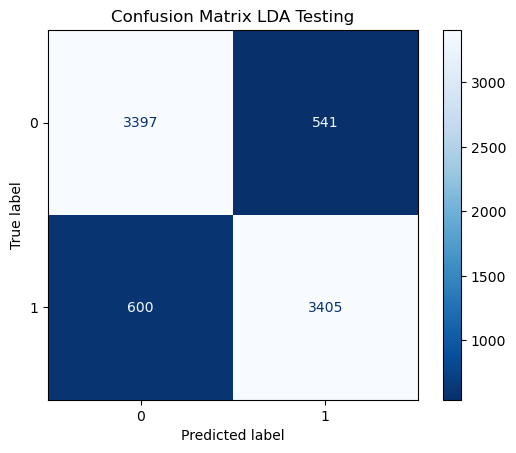

In [93]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lda), display_labels = np.unique(y_test))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix LDA Testing')

In [94]:
qda = QDA()
qda.fit(X_test, y_test)
y_pred = qda.predict(X_test)

In [95]:
y_pred_qda = qda.predict(X_test)
print(confusion_matrix(y_test, y_pred_qda))
print('\n')


print('Misclassfication rate:', 1-accuracy_score(y_test, y_pred_qda))
     

[[3399  539]
 [1093 2912]]


Misclassfication rate: 0.20546393050484701


Text(0.5, 1.0, 'Confusion Matrix QDA Testing')

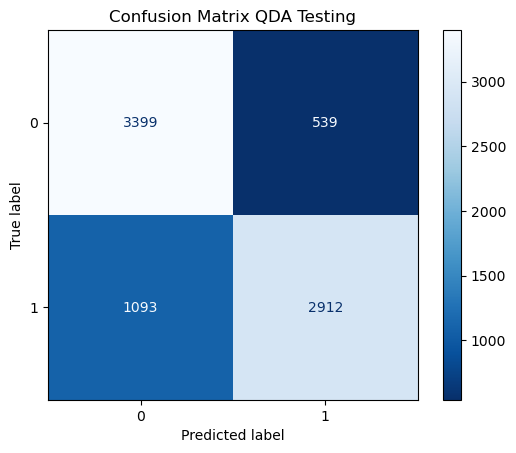

In [96]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_qda), display_labels = np.unique(y_test))
cm_display.plot(cmap="Blues_r")
plt.title('Confusion Matrix QDA Testing')

In [97]:
roc_lda = roc_curve(y_pred_lda, fitted.predict_proba(X_test)[:,1])

In [98]:
roc_qda = roc_curve(y_pred_qda, fitted.predict_proba(X_test)[:,1])

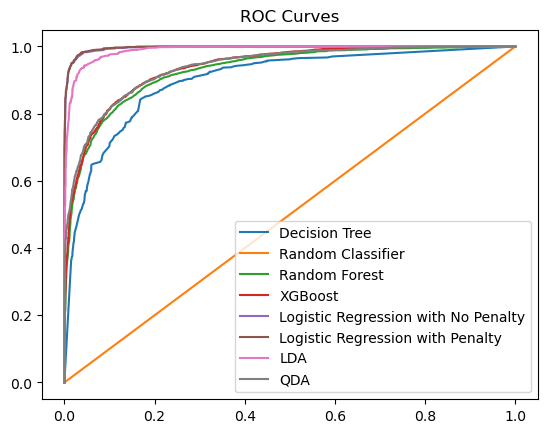

In [99]:
line1, = plt.plot(roc_decision[0],roc_decision[1])
line2, = plt.plot([0,1], [0,1])
line3, = plt.plot(roc_random[0],roc_random[1])
line4, = plt.plot(roc_xgb[0], roc_xgb[1])
line5, = plt.plot(roc_clf[0], roc_clf[1])
line6, = plt.plot(roc_clf2[0], roc_clf2[1])
line7, = plt.plot(roc_lda[0], roc_lda[1])
line8, = plt.plot(roc_qda[0], roc_qda[1])
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), 
           ('Decision Tree', 'Random Classifier', 'Random Forest','XGBoost', 'Logistic Regression with No Penalty',
           'Logistic Regression with Penalty', 'LDA', 'QDA'))
plt.title('ROC Curves')
plt.show()